In [2]:
import numpy
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
%matplotlib inline

In [60]:
# Grab the data
object_df = pd.read_csv('/home/will/language_dataset/object.csv')
rhyme_df = pd.read_csv('/home/will/language_dataset/rhyme.csv')
sentence_df = pd.read_csv('/home/will/language_dataset/sentence.csv')
wordgen_df = pd.read_csv('/home/will/language_dataset/wordgen.csv')
scenemem_df = pd.read_csv('/home/will/language_dataset/scenemem.csv')
master_df = pd.read_csv('/home/will/language_dataset/master.csv')

# Column names for object and rhyme DFs
columns1 = ["subject", "Task", "broca's area left %","broca's area right %", "broca's area left voxels",
                              "broca's area right voxels", "broca's area LI", "whole brain left %",
                              "whole brain right %", "whole brain left voxels","whole brain right voxels",
                              "whole brain LI","planum temporale left %",
                              "planum temporale right %", "planum temporale left voxels","planum temporale right voxels",
                              "planum temporale LI", "angular gyrus left %","angular gyrus right %",
                              "angular gyrus left voxels", "angular gyrus right voxels", "angular gyrus LI",
                               "FramewiseDisplacement", "tSNR", "sum broca"]
# Column names for sentence DFs (planum temporale, angular gyrus, broca's area, and whole brain are abbreviated)
columns_sentence = ["subject", "Task", "ba left %","ba right %", "ba left voxels",
                              "ba right voxels", "ba LI", "wb left %",
                              "wb right %", "wb left voxels","wb right voxels",
                              "wb LI", "pt left %",
                              "pt right %", "pt left voxels","pt right voxels","pt LI", "ag left %","ag right %",
                              "ag left voxels", "ag right voxels", "ag LI", "FramewiseDisplacement", "tSNR", "sum broca"]
# Column names for wordgen DFs (planum temporale and angular gyrus are abbreviated)
columns_wordgen = ["subject", "Task", "broca's area left %","broca's area right %", "broca's area left voxels",
                              "broca's area right voxels", "broca's area LI", "whole brain left %",
                              "whole brain right %", "whole brain left voxels","whole brain right voxels",
                              "whole brain LI", "pt left %",
                              "pt right %", "pt left voxels","pt right voxels","pt LI", "ag left %","ag right %",
  
                   "ag left voxels", "ag right voxels", "ag LI", "FramewiseDisplacement", "tSNR", "sum broca"]

### Create subset dataframe: all the columns that all the tasks have in common###
object_sub = object_df.loc[:,columns1]
rhyme_sub = rhyme_df.loc[:,columns1]
sentence_sub = sentence_df.loc[:,columns_sentence]
wordgen_sub = wordgen_df.loc[:,columns_wordgen]

# Reassign the column names for sentence and wordgen to match object and rhyme
sentence_sub.columns = columns1
wordgen_sub.columns = columns1

df_list = [object_sub, rhyme_sub, sentence_sub, wordgen_sub]
sub_df = pd.concat(df_list, 0)

### Split up master dataframe by subject
columns_master = ["subject","Task","Type","whole brain left %","broca's area left %","inferior frontal gyrus left %","middle frontal gyrus left %","superior frontal gyrus left %","frontal lobe left %","inferior temporal gyrus left %","middle temporal gyrus left %","superior temporal gyrus left %","planum temporale left %","angular gyrus left %","whole brain right %","broca's area right %","inferior frontal gyrus right %","middle frontal gyrus right %","superior frontal gyrus right %","frontal lobe right %","inferior temporal gyrus right %","middle temporal gyrus right %","superior temporal gyrus right %","planum temporale right %","angular gyrus right %","whole brain LI","broca's area LI","inferior frontal gyrus LI","middle frontal gyrus LI","superior frontal gyrus LI","frontal lobe LI","inferior temporal gyrus LI","middle temporal gyrus LI","superior temporal gyrus LI","planum temporale LI","angular gyrus LI","whole brain left voxels","broca's area left voxels","inferior frontal gyrus left voxels","middle frontal gyrus left voxels","superior frontal gyrus left voxels","frontal lobe left voxels","inferior temporal gyrus left voxels","middle temporal gyrus left voxels","superior temporal gyrus left voxels","planum temporale left voxels","angular gyrus left voxels","whole brain right voxels","broca's area right voxels","inferior frontal gyrus right voxels","middle frontal gyrus right voxels","superior frontal gyrus right voxels","frontal lobe right voxels","inferior temporal gyrus right voxels","middle temporal gyrus right voxels","superior temporal gyrus right voxels","planum temporale right voxels","angular gyrus right voxels","whole brain sum","broca's area sum","inferior frontal gyrus sum","middle frontal gyrus sum","superior frontal gyrus sum","frontal lobe sum","inferior temporal gyrus sum","middle temporal gyrus sum","superior temporal gyrus sum","planum temporale sum","angular gyrus sum","FramewiseDisplacement","tSNR", "Zeros"]

to_keep = ["superior temporal gyrus LI","middle temporal gyrus LI", "angular gyrus LI", "planum temporale LI", "inferior frontal gyrus","broca's area LI", "frontal lobe LI"]
LI_vars=[x for x in columns_master if x not in to_keep]
to_keep2 = ["superior temporal gyrus sum","middle temporal gyrus sum", "angular gyrus sum", "planum temporale sum", "superior frontal gyrus sum","broca's area sum"]
sum_vars=[x for x in columns_master if x not in to_keep2]
to_keep3 = ["superior temporal gyrus left %","middle temporal gyrus left %", "angular gyrus left %", "planum temporale left %", "superior frontal gyrus left %","broca's area left %"]
perc_vars=[x for x in columns_master if x not in to_keep3]

master_melt = pd.melt(master_df, id_vars=LI_vars, var_name="ROI")
master_melt2 = pd.melt(master_df, id_vars=sum_vars, var_name="ROI total")
master_melt3 = pd.melt(master_df, id_vars=perc_vars, var_name="ROI Left %")

sentence_sub2 = master_df[master_df['Task'].str.contains('sentence')]
sentence_melt = pd.melt(sentence_sub2, id_vars=LI_vars, var_name="ROI LI")
sentence_melt2 = pd.melt(sentence_sub2, id_vars=sum_vars, var_name="ROI total")
sentence_melt3 = pd.melt(sentence_sub2, id_vars=perc_vars, var_name="ROI Left %")

wordgen_sub2 = master_df[master_df['Task'].str.contains('wordgen')]
wordgen_melt = pd.melt(wordgen_sub2, id_vars=LI_vars, var_name="ROI LI")
wordgen_melt2 = pd.melt(wordgen_sub2, id_vars=sum_vars, var_name="ROI total")
wordgen_melt3 = pd.melt(wordgen_sub2, id_vars=perc_vars, var_name="ROI Left %")

object_sub2 = master_df[master_df['Task'].str.contains('object')]
object_melt = pd.melt(object_sub2, id_vars=LI_vars, var_name="ROI LI")
object_melt2 = pd.melt(object_sub2, id_vars=sum_vars, var_name="ROI total")
object_melt3 = pd.melt(object_sub2, id_vars=perc_vars, var_name="ROI Left %")

rhyme_sub2 = master_df[master_df['Task'].str.contains('rhyme')]
rhyme_melt = pd.melt(rhyme_sub2, id_vars=LI_vars, var_name="ROI LI")
rhyme_melt2 = pd.melt(rhyme_sub2, id_vars=sum_vars, var_name="ROI total")
rhyme_melt3 = pd.melt(rhyme_sub2, id_vars=perc_vars, var_name="ROI Left %")

# scenemem melting
sm_vars = ["subject","Task","Type","mTL left %","hippocampus left %","amygdala left %","phg left %","entorhinal left %","mTL right %","hippocampus right %","amygdala right %","phg right %","entorhinal right %","mTL left voxels","hippocampus left voxels","amygdala left voxels","phg left voxels","entorhinal left voxels","mTL right voxels","hippocampus right voxels","amygdala right voxels","phg right voxels","entorhinal right voxels","FramewiseDisplacement","tSNR"]
scenemem_melt = pd.melt(scenemem_df, id_vars=sm_vars, var_name="ROI LI")

scenemem_left_temporal = scenemem_df.loc[scenemem_df['Type'] == "left temporal"]
scenemem_right_temporal = scenemem_df.loc[scenemem_df['Type'] == "right temporal"]


# tSNR distribution by task

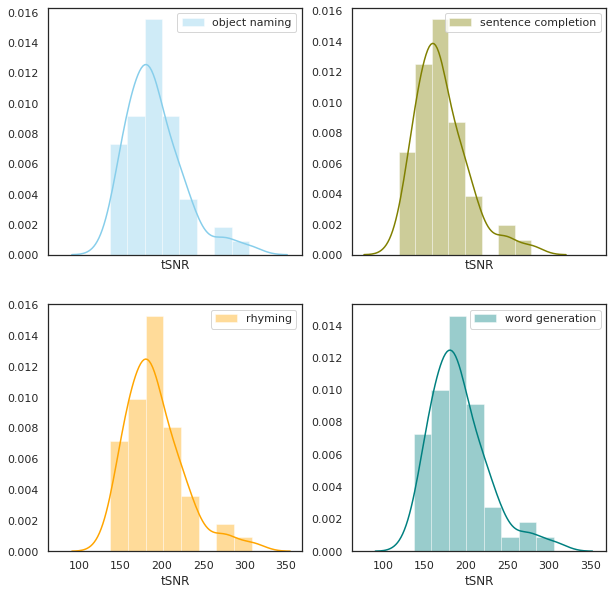

In [123]:
# Method 1: on different Axes
sns.set(style="white")
f, axes = plt.subplots(2, 2, figsize=(10, 10), sharex=True)
sns.distplot( object_sub2["tSNR"] , color="skyblue", ax=axes[0, 0], label="object naming")
axes[0,0].legend()
sns.distplot( sentence_sub2["tSNR"] , color="olive", ax=axes[0, 1], label="sentence completion")
axes[0,1].legend()
sns.distplot( rhyme_sub2["tSNR"] , color="orange", ax=axes[1, 0], label="rhyming")
axes[1,0].legend()
sns.distplot( wordgen_sub2["tSNR"] , color="teal", ax=axes[1, 1], label="word generation")
axes[1,1].legend()
plt.show()

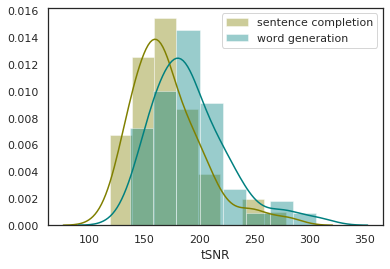

In [126]:
# Method 2: on the same Axis
sns.distplot( sentence_sub2["tSNR"],  color="olive", label="sentence completion")
sns.distplot( wordgen_sub2["tSNR"],  color="teal", label="word generation")
plt.legend()
plt.show()

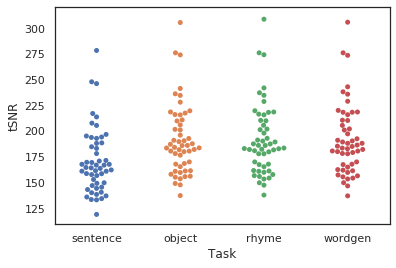

In [125]:
# Method 3: cat plot
sns.swarmplot(x="Task", y="tSNR", data=master_df)
plt.show()

# Framewise Displacement distribution

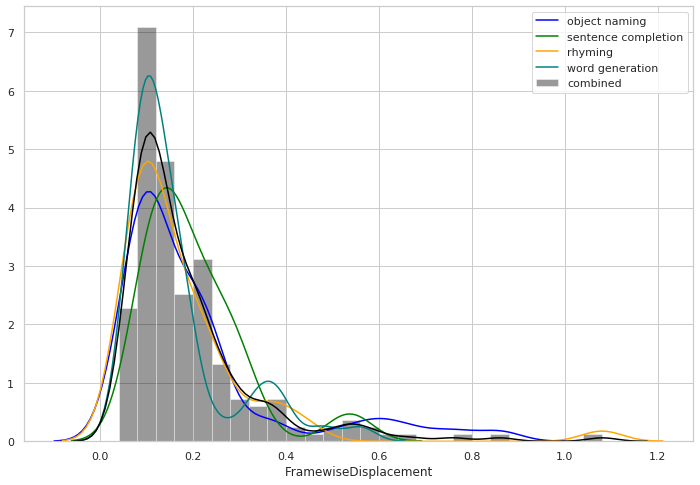

In [122]:
# Method 1: on different Axes
plt.figure(figsize=(12,8))
sns.distplot(object_sub2["FramewiseDisplacement"], color="blue", label="object naming", hist=False)
sns.distplot(sentence_sub2["FramewiseDisplacement"], color="green", label="sentence completion", hist=False)
sns.distplot(rhyme_sub2["FramewiseDisplacement"], color="orange", label="rhyming", hist=False)
sns.distplot(wordgen_sub2["FramewiseDisplacement"], color="teal",label="word generation", hist=False)
sns.distplot(master_df["FramewiseDisplacement"], color="black", label="combined")
plt.legend()
plt.show()

sns.swarmplot(x="Task", y="FramewiseDisplacement", data=sub_df)
plt.show()

# Motion and tSNR

<Figure size 720x432 with 0 Axes>

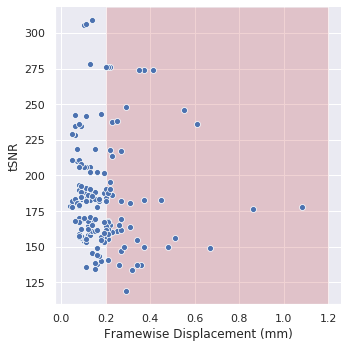

In [135]:
plt.figure(figsize=(10,6))
sns.relplot(x='FramewiseDisplacement', y='tSNR', data=sub_df, zorder=2)
plt.axvspan(0.2, 1.2, facecolor='r', alpha=0.25, zorder=1)
plt.xlabel("Framewise Displacement (mm)")
plt.show()

# Motion and laterality

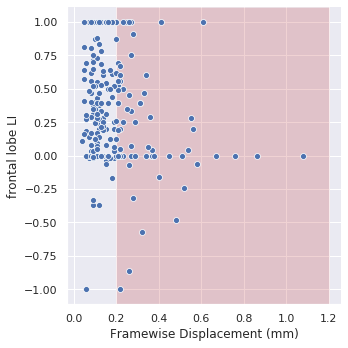

In [133]:
sns.set(style="darkgrid")
sns.relplot(y="frontal lobe LI", x="FramewiseDisplacement", data=master_df, zorder=2);
plt.xlabel("Framewise Displacement (mm)")
plt.axvspan(0.2, 1.2, facecolor='r', alpha=0.25, zorder=1)
plt.show()

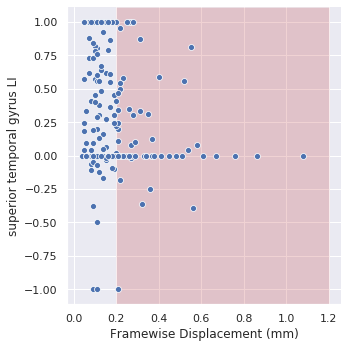

In [134]:
sns.set(style="darkgrid")
sns.relplot(y="superior temporal gyrus LI", x="FramewiseDisplacement", data=master_df, zorder=2);
plt.xlabel("Framewise Displacement (mm)")
plt.axvspan(0.2, 1.2, facecolor='r', alpha=0.25, zorder=1)
plt.show()

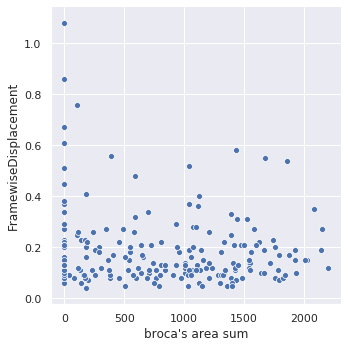

In [144]:
sns.relplot(x="broca's area sum", y="FramewiseDisplacement", data=master_df);

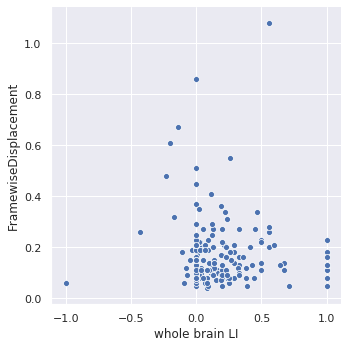

In [11]:
sns.relplot(x="whole brain LI", y="FramewiseDisplacement", data=sub_df);

# Influence of noise voxels

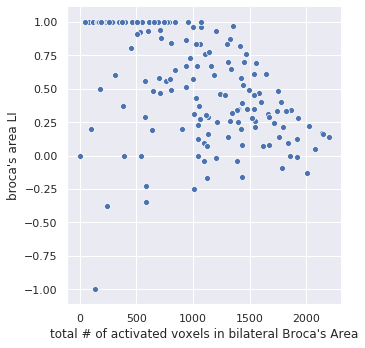

In [147]:
sns.relplot(x="broca's area sum", y="broca's area LI", data=master_df);
plt.xlabel("total # of activated voxels in bilateral Broca's Area")
plt.show()

Text(0.5, 8.95999999999998, 'total # of activated voxels in both hemispheres')

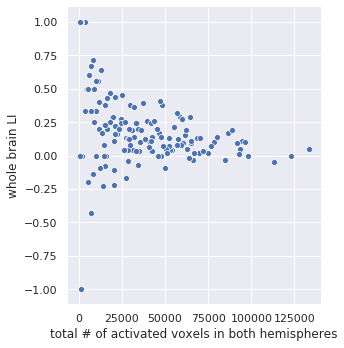

In [153]:
sns.relplot(x="whole brain sum", y="whole brain LI", data=master_df);
plt.xlabel("total # of activated voxels in both hemispheres")

# Task differences

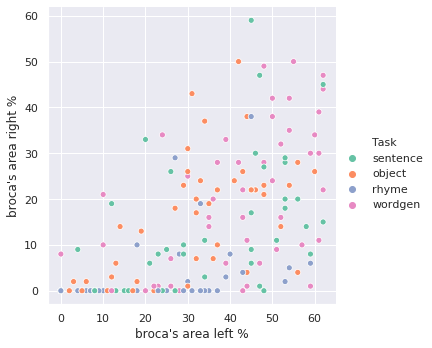

In [57]:
sns.set(style="darkgrid")
sns.relplot(x="broca's area left %", y="broca's area right %", hue="Task", data=master_df, palette="Set2")

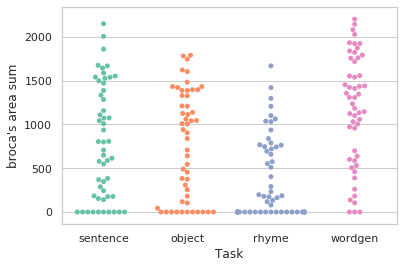

In [98]:
sns.set(style="whitegrid")
sns.swarmplot(x="Task", y="broca's area sum", data=master_df, palette="Set2")

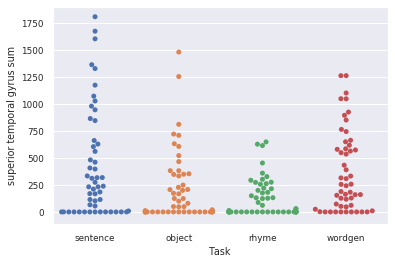

In [66]:
sns.swarmplot(x="Task", y="superior temporal gyrus sum", data=master_df)

# ROI x Task

<Figure size 1008x576 with 0 Axes>

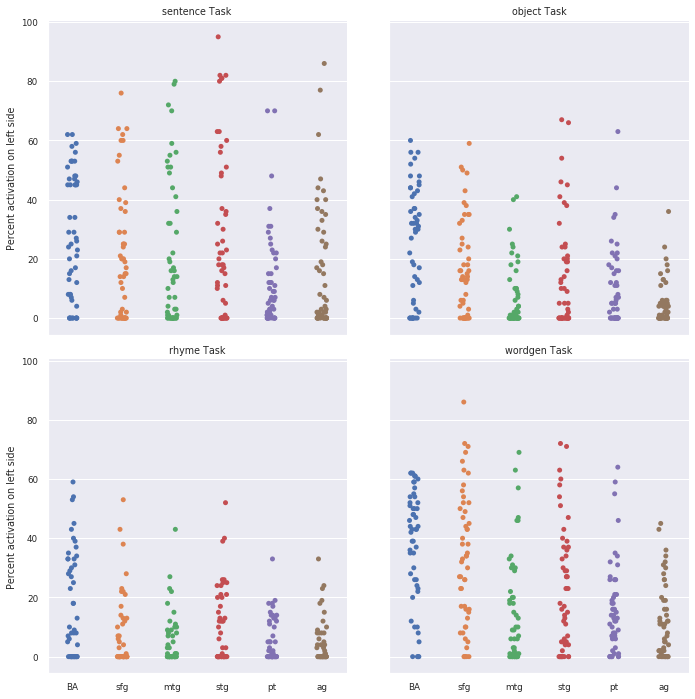

In [30]:
plt.figure(figsize=(14,8))
sns.set(style="darkgrid", font_scale=.8)
rt = sns.catplot(x="ROI Left %", y="value", col="Task", col_wrap=2, data=master_melt3)
(rt.set_axis_labels("", "Percent activation on left side")
  .set_xticklabels(["BA", "sfg", "mtg","stg", "pt","ag"])
  .set_titles("{col_name} {col_var}"))  

(-0.25, 100)

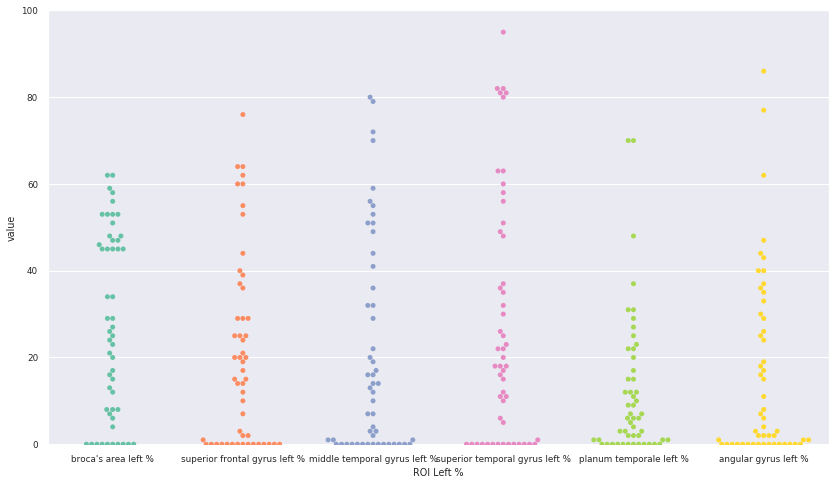

In [59]:
plt.figure(figsize=(14,8))
sns.set(style="darkgrid", font_scale=.8)
rt2 = sns.swarmplot(x="ROI Left %", y="value",data=sentence_melt3, palette="Set2")
rt2.set_ylim([-0.25,100])


# ROI comparisons

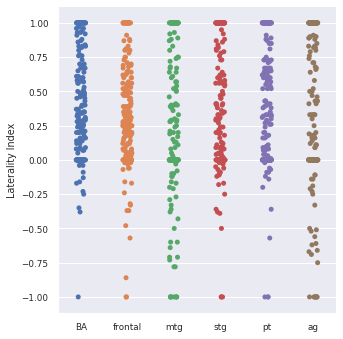

In [65]:
g = sns.catplot(x="ROI", y="value", data=master_melt)
(g.set_axis_labels("", "Laterality Index")
  .set_xticklabels(["BA", "frontal", "mtg","stg", "pt","ag"])
  .set_titles("{col_name} {col_var}"))  
plt.show()

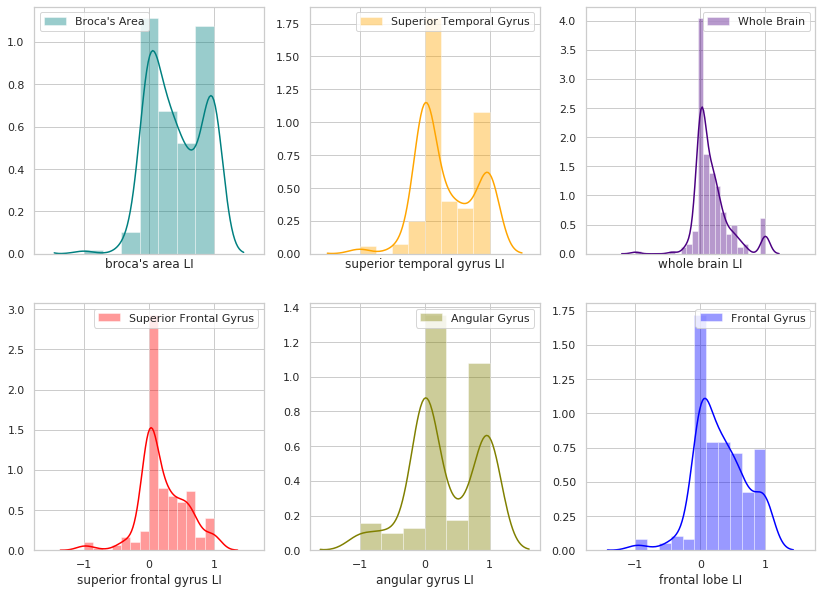

In [23]:
sns.set(style="whitegrid")
f, axes = plt.subplots(2, 3, figsize=(14, 10), sharex=True)
sns.distplot(master_df["broca's area LI"], color="teal", ax=axes[0, 0], label="Broca's Area")
axes[0,0].legend()
sns.distplot(master_df["superior temporal gyrus LI"], color="orange", ax=axes[0, 1], label="Superior Temporal Gyrus")
axes[0,1].legend()
sns.distplot(master_df["superior frontal gyrus LI"], color="red", ax=axes[1, 0], label="Superior Frontal Gyrus")
axes[1,0].legend()
sns.distplot(master_df["angular gyrus LI"], color="olive", ax=axes[1, 1], label="Angular Gyrus")
axes[1,1].legend()
sns.distplot(master_df["whole brain LI"], color="indigo", ax=axes[0, 2], label="Whole Brain")
axes[0,2].legend()
sns.distplot(master_df["frontal lobe LI"], color="blue", ax=axes[1, 2], label="Frontal Gyrus")
axes[1,2].legend()


plt.show()

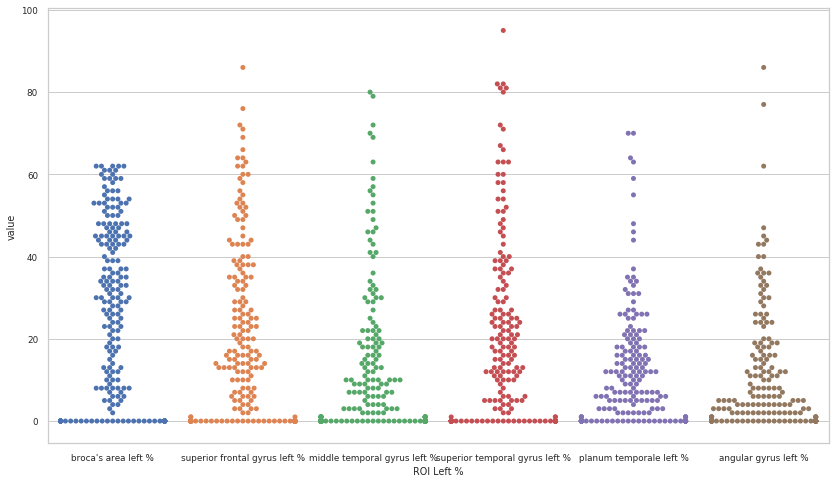

In [218]:
plt.figure(figsize=(14,8))
sns.set(style="whitegrid", font_scale=.8)
s2 = sns.swarmplot(x="ROI Left %", y="value",data=master_melt3)


# Group Comparison

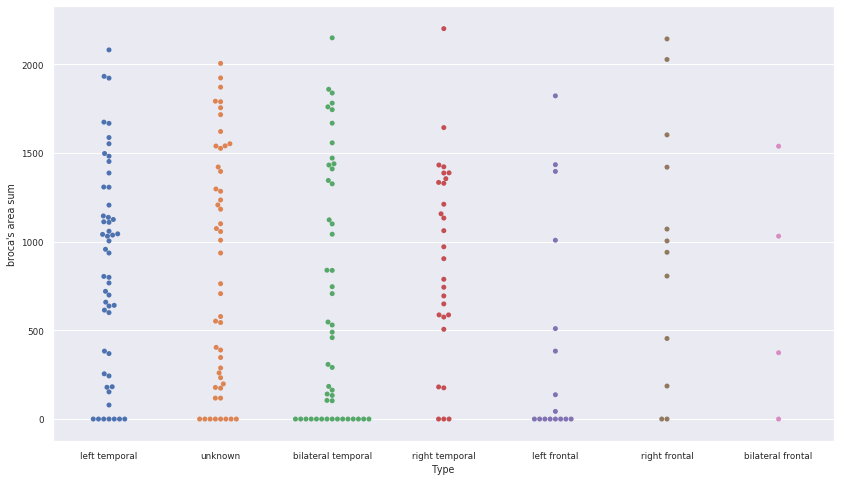

In [78]:
plt.figure(figsize=(14,8))
sns.set(style="darkgrid", font_scale=.8)
sns.swarmplot(x='Type', y="broca's area sum", data=master_df)

## Scene Memory

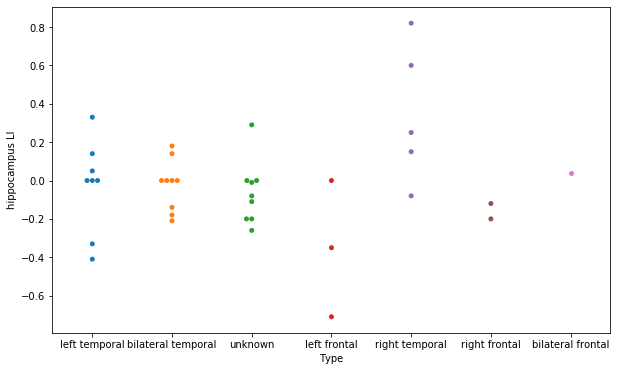

In [21]:
plt.figure(figsize=(10,6))
sns.swarmplot(x='Type', y='hippocampus LI', data=scenemem_df)

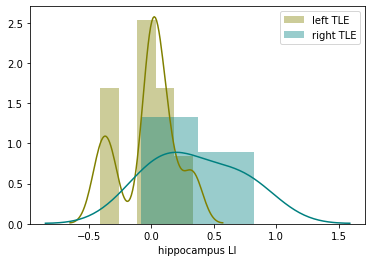

In [40]:
sns.distplot( scenemem_left_temporal["hippocampus LI"],  color="olive", label="left TLE")
sns.distplot( scenemem_right_temporal["hippocampus LI"],  color="teal", label="right TLE")
plt.legend()
plt.show()